In [1]:
import pickle 
from sklearn.cluster import KMeans
import pandas as pd


feature_path = "/user/zhouyz/rec/recbole_v2/dataset/m4a/m4a-muq.pkl"
with open(feature_path, 'rb') as f:
    m4a_muq = pickle.load(f)

In [ ]:
import numpy as np
vectors = np.array(list(m4a_muq.values()))
vectors.shape # (109269, 12, 1024)

(109269, 12, 1024)

In [4]:
def cluster_features(features, selected_layer=-1, n_clusters=10):
    keys = list(features.keys())
    vectors = np.array(list(m4a_muq.values()))[:, selected_layer, :]
    all_results = []
    print("开始聚类...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

    kmeans.fit(vectors)
    labels = kmeans.labels_

    clustered_results = {key: label for key, label in zip(keys, labels)}

    return clustered_results

In [5]:
import os
n_clusters = 16
output_dir = "/user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans"
os.makedirs(output_dir, exist_ok=True)
item_ids = list(m4a_muq.keys())
# 创建一个空的 DataFrame 来存储所有层的聚类结果
all_clusters_df = pd.DataFrame(index=item_ids)

# 聚类每一层特征
for layer in range(12):
    print(f"聚类第 {layer} 层特征，聚类数目为 {n_clusters}")
    clustered_results = cluster_features(m4a_muq, selected_layer=layer, n_clusters=n_clusters)
    # 将当前层的结果作为新的一列添加到 DataFrame
    all_clusters_df[f'layer_{layer}'] = pd.Series(clustered_results)

output_path = os.path.join(output_dir, "m4a-muq-all-layers-clusters.csv")
all_clusters_df.to_csv(output_path)

print(f"所有层的聚类结果已合并并保存到 {output_path}")
all_clusters_df.head()

聚类第 0 层特征，聚类数目为 16
开始聚类...
聚类第 1 层特征，聚类数目为 16
开始聚类...
聚类第 2 层特征，聚类数目为 16
开始聚类...
聚类第 3 层特征，聚类数目为 16
开始聚类...
聚类第 4 层特征，聚类数目为 16
开始聚类...
聚类第 5 层特征，聚类数目为 16
开始聚类...
聚类第 6 层特征，聚类数目为 16
开始聚类...
聚类第 7 层特征，聚类数目为 16
开始聚类...
聚类第 8 层特征，聚类数目为 16
开始聚类...
聚类第 9 层特征，聚类数目为 16
开始聚类...
聚类第 10 层特征，聚类数目为 16
开始聚类...
聚类第 11 层特征，聚类数目为 16
开始聚类...
所有层的聚类结果已合并并保存到 /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters.csv


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
nY8kSl5gwdOeaEW0,15,1,2,13,9,7,15,12,13,1,6,4
I1aB08TPOyXMf8qh,14,11,0,12,2,1,2,9,7,7,8,6
VPT4olSly49ZNqlh,12,10,4,5,7,8,5,15,8,2,15,11
x48pzNjf6mlUJ27f,13,9,11,6,8,6,9,5,14,3,5,10
AkeYqvR2u32f0Zfa,0,15,13,0,0,5,0,0,0,13,11,0


In [ ]:

import os

# 设置不同的聚类数
cluster_numbers = [8, 16, 32, 64]
output_dir = "/user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans"
os.makedirs(output_dir, exist_ok=True)
item_ids = list(m4a_muq.keys())
results = {}
for n_clusters in cluster_numbers:
    print(f"===== 开始处理聚类数: {n_clusters} =====")
    # 创建一个空的 DataFrame 来存储所有层的聚类结果
    all_clusters_df = pd.DataFrame(index=item_ids)

    # 聚类每一层特征
    for layer in range(12):
        print(f"聚类第 {layer} 层特征，聚类数目为 {n_clusters}")
        clustered_results = cluster_features(m4a_muq, selected_layer=layer, n_clusters=n_clusters)
        # 将当前层的结果作为新的一列添加到 DataFrame
        all_clusters_df[f'layer_{layer}'] = pd.Series(clustered_results)

    # 为每个聚类数生成不同的文件名
    output_filename = f"m4a-muq-all-layers-clusters-{n_clusters}.csv"
    output_path = os.path.join(output_dir, output_filename)
    all_clusters_df.to_csv(output_path)
    results[n_clusters] = all_clusters_df

    print(f"聚类数为 {n_clusters} 的结果已保存到 {output_path}")
    print(f"===== 完成处理聚类数: {n_clusters} =====\n")

print("所有聚类任务完成。")


===== 开始处理聚类数: 8 =====
聚类第 0 层特征，聚类数目为 8
开始聚类...
聚类第 1 层特征，聚类数目为 8
开始聚类...
聚类第 2 层特征，聚类数目为 8
开始聚类...
聚类第 3 层特征，聚类数目为 8
开始聚类...
聚类第 4 层特征，聚类数目为 8
开始聚类...
聚类第 5 层特征，聚类数目为 8
开始聚类...
聚类第 6 层特征，聚类数目为 8
开始聚类...
聚类第 7 层特征，聚类数目为 8
开始聚类...
聚类第 8 层特征，聚类数目为 8
开始聚类...
聚类第 9 层特征，聚类数目为 8
开始聚类...
聚类第 10 层特征，聚类数目为 8
开始聚类...
聚类第 11 层特征，聚类数目为 8
开始聚类...
聚类数为 8 的结果已保存到 /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-8.csv
===== 完成处理聚类数: 8 =====

===== 开始处理聚类数: 16 =====
聚类第 0 层特征，聚类数目为 16
开始聚类...
聚类第 1 层特征，聚类数目为 16
开始聚类...
聚类第 2 层特征，聚类数目为 16
开始聚类...
聚类第 3 层特征，聚类数目为 16
开始聚类...
聚类第 4 层特征，聚类数目为 16
开始聚类...
聚类第 5 层特征，聚类数目为 16
开始聚类...
聚类第 6 层特征，聚类数目为 16
开始聚类...
聚类第 7 层特征，聚类数目为 16
开始聚类...
聚类第 8 层特征，聚类数目为 16
开始聚类...
聚类第 9 层特征，聚类数目为 16
开始聚类...
聚类第 10 层特征，聚类数目为 16
开始聚类...
聚类第 11 层特征，聚类数目为 16
开始聚类...
聚类数为 16 的结果已保存到 /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-16.csv
===== 完成处理聚类数: 16 =====

===== 开始处理聚类数: 32 =====
聚类第 0 层特征，聚类数目为 32
开始聚类...
聚类第 1 层特征，聚类数目为 32


In [7]:
from sklearn.metrics import adjusted_rand_score

# 提取 layer_0 和 layer_1 的聚类标签
labels_layer0 = all_clusters_df['layer_0']
labels_layer1 = all_clusters_df['layer_1']

# 计算调整兰德指数 (ARI)
ari = adjusted_rand_score(labels_layer0, labels_layer1)

print(f"Layer 0 和 Layer 1 聚类结果的调整兰德指数 (ARI) 是: {ari:.4f}")

# 解释 ARI 分数
if ari > 0.9:
    print("聚类结果高度相似。")
elif ari > 0.6:
    print("聚类结果中度相似。")
else:
    print("聚类结果相似度较低。")

Layer 0 和 Layer 1 聚类结果的调整兰德指数 (ARI) 是: 0.4752
聚类结果相似度较低。


各层聚类结果之间的调整兰德指数 (ARI) 表格:


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.475250,0.366920,0.314832,0.317450,0.302455,0.264369,0.229992,0.210207,0.149057,0.125669,0.124371
layer_1,0.475250,1.000000,0.465658,0.398928,0.446673,0.372556,0.337548,0.286086,0.269887,0.197529,0.147285,0.154742
layer_2,0.366920,0.465658,1.000000,0.536338,0.482427,0.492441,0.444407,0.353582,0.332398,0.253526,0.185287,0.187701
layer_3,0.314832,0.398928,0.536338,1.000000,0.585117,0.627024,0.522456,0.491598,0.440588,0.291991,0.198800,0.204670
layer_4,0.317450,0.446673,0.482427,0.585117,1.000000,0.597288,0.528890,0.429925,0.396320,0.248185,0.177951,0.181640
layer_5,0.302455,0.372556,0.492441,0.627024,0.597288,1.000000,0.690573,0.542749,0.487340,0.287527,0.217267,0.205332
layer_6,0.264369,0.337548,0.444407,0.522456,0.528890,0.690573,1.000000,0.538486,0.570542,0.335806,0.237024,0.225908
layer_7,0.229992,0.286086,0.353582,0.491598,0.429925,0.542749,0.538486,1.000000,0.640182,0.347819,0.257785,0.239124
layer_8,0.210207,0.269887,0.332398,0.440588,0.396320,0.487340,0.570542,0.640182,1.000000,0.408361,0.282121,0.263972
layer_9,0.149057,0.197529,0.253526,0.291991,0.248185,0.287527,0.335806,0.347819,0.408361,1.000000,0.391911,0.377254


/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtoo

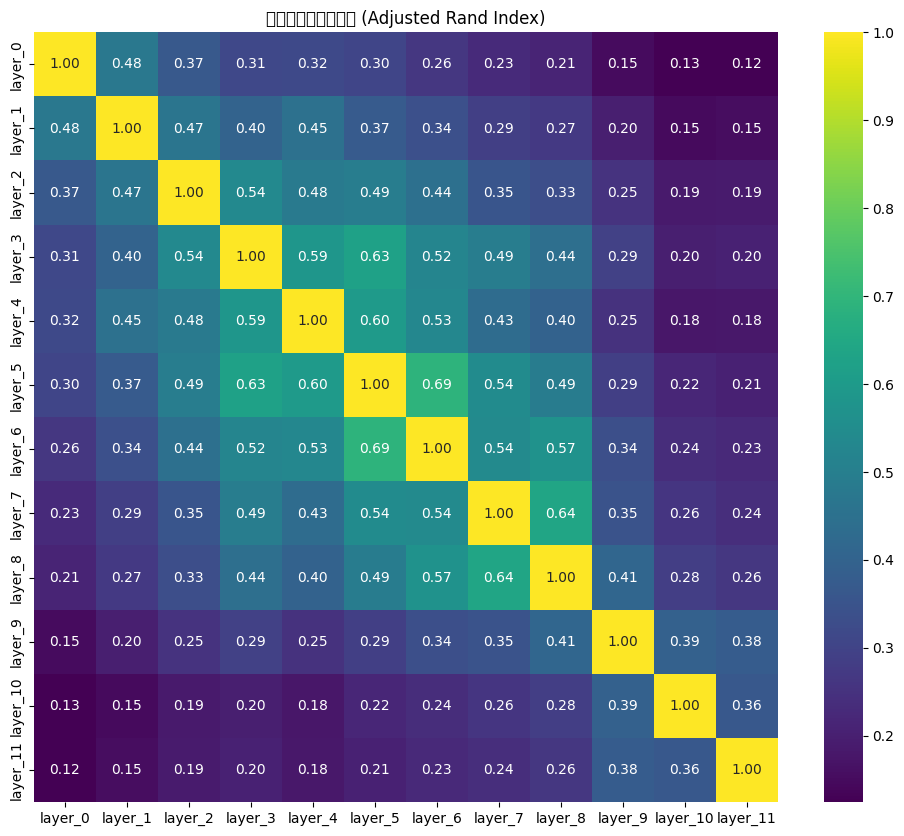

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_layers = 12
layer_names = [f'layer_{i}' for i in range(num_layers)]

# 初始化一个空的 DataFrame 来存储 ARI 分数
ari_matrix = pd.DataFrame(np.zeros((num_layers, num_layers)), index=layer_names, columns=layer_names)

# 两两计算 ARI 分数
for i in range(num_layers):
    for j in range(i, num_layers):
        labels_i = all_clusters_df[f'layer_{i}']
        labels_j = all_clusters_df[f'layer_{j}']
        
        ari = adjusted_rand_score(labels_i, labels_j)
        
        ari_matrix.iloc[i, j] = ari
        ari_matrix.iloc[j, i] = ari

print("各层聚类结果之间的调整兰德指数 (ARI) 表格:")
display(ari_matrix)

# 使用热力图可视化 ARI 矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(ari_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Adjusted Rand Index')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    cluster_points = reduced_vectors[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {i}", s=1)

# 标注每个点的 key
# for i, key in enumerate(keys):
    # plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], key, fontsize=9)

ax.set_title("3D Clustering Visualization")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.legend()
plt.show()

{'nY8kSl5gwdOeaEW0': np.int32(0),
 'I1aB08TPOyXMf8qh': np.int32(6),
 'VPT4olSly49ZNqlh': np.int32(4),
 'x48pzNjf6mlUJ27f': np.int32(3),
 'AkeYqvR2u32f0Zfa': np.int32(6),
 'wVDd5LvB2hPiRq0E': np.int32(1),
 '7ewR2NoUJ2BKFRjF': np.int32(1),
 '9kvacaCzzcavD7Ud': np.int32(6),
 'hyXGa7AYJyPCnzI8': np.int32(2),
 'eEKZZc9Qmbv6e48I': np.int32(8),
 'BBL261Oe5JAib5at': np.int32(0),
 'lyh6uLUf8EJ21oGh': np.int32(3),
 'Hqp1sb0odIggNdro': np.int32(4),
 'eQI2vyQRvuUrbP6G': np.int32(4),
 '4lIZeFAb2MPTeFrc': np.int32(9),
 'OFbYCifnZFkRhcdB': np.int32(9),
 'SPKYPJ0yjaK8QeR9': np.int32(8),
 'iPp9PHatFjWYr77A': np.int32(1),
 'wm1T6O36izEGTkzI': np.int32(4),
 'ZKz2NGZzBoVp7aOS': np.int32(1),
 'HzvHxcb7M6UHf212': np.int32(8),
 'E2QHbBXQNlvoobQ3': np.int32(7),
 'Abmyd1FMiwvht62M': np.int32(4),
 'cdNV17wYeJQJFS57': np.int32(6),
 'sXsynyMwt74EfhNn': np.int32(5),
 'oWO1AgXfGbo9zDnq': np.int32(5),
 'xsb1T30LDujXvLFo': np.int32(1),
 '3dwil4nYh1KdOQDq': np.int32(3),
 'pkzbnslE6Gk7KYlF': np.int32(2),
 'LxaeMHdszJpK